# Module 3 Color Exercise

**In these exercises, we will create plots with correct and adequate color schemes similar to the practice.** 

In [49]:
library(ggplot2)
library(RColorBrewer)

**Activity 1:** Display colormaps with seven colors from RColorBrewer library for a **sequential** data type with **colorblind safe** colors.

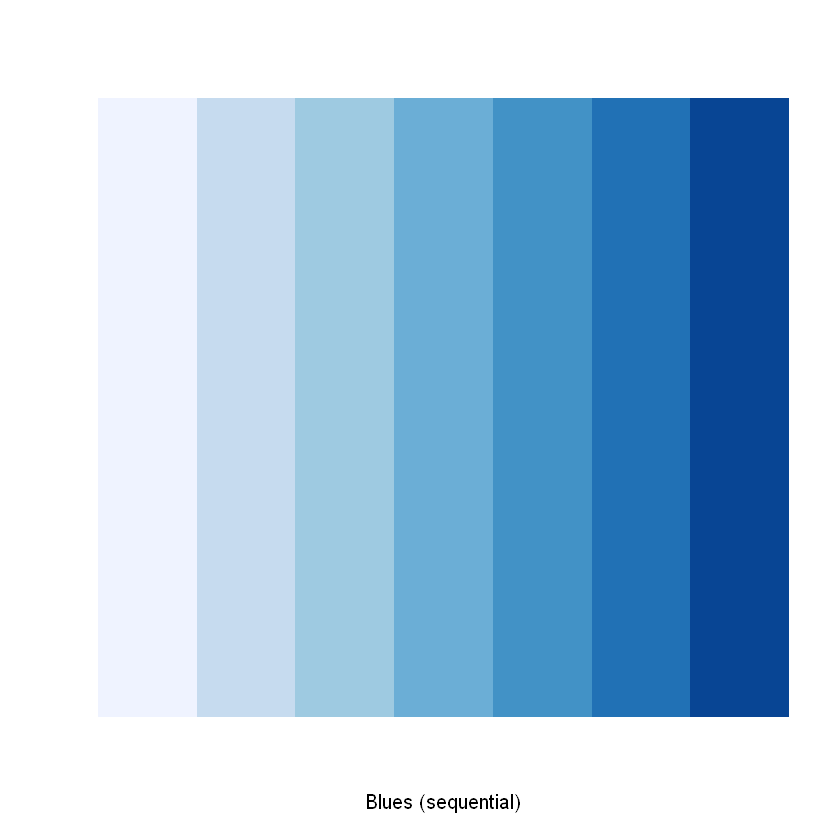

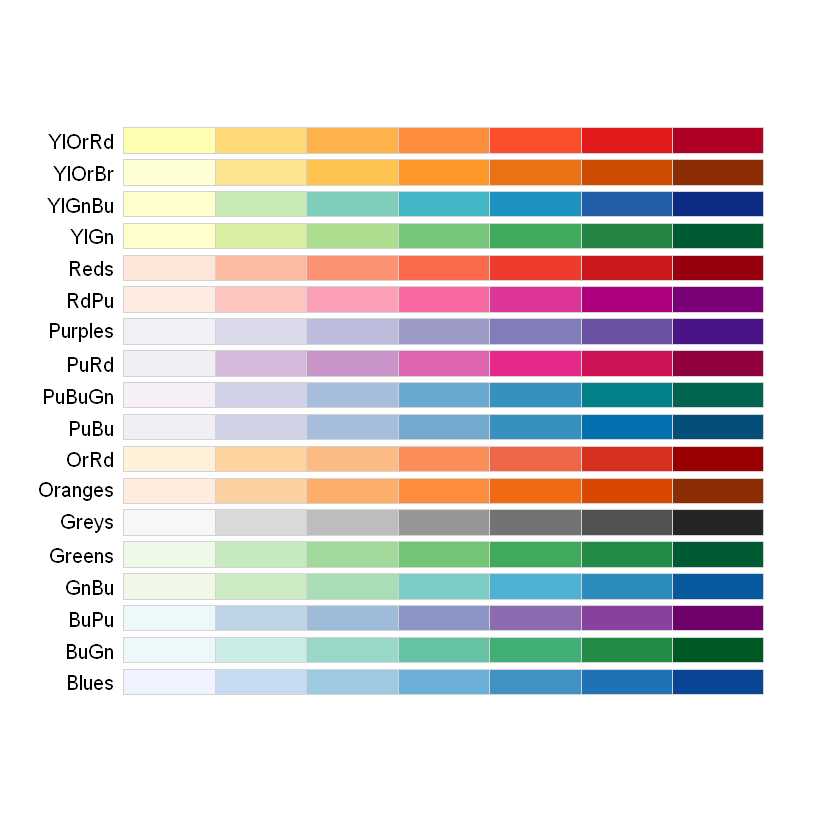

In [50]:
# Retrieve the YlGnBu palette with 7 colors
n = 7
display.brewer.pal(n, name = "Blues" )
display.brewer.all(n, type="seq", select=NULL, exact.n=TRUE, colorblindFriendly=TRUE)

**Activity 2:** Create (draw) a **(1) colorblind safe colormap (colorbar) with 100 colors** from the **dichromat library**, and **(2) display their hexadecimal codes**.

[1] "#CD4851" "#CF4D55" "#D15259" "#D2575D" "#D45C61" "#D56065" "#D66569"
  [8] "#D8696D" "#D96E72" "#DA7276" "#DB767A" "#DD7A7F" "#DD7E82" "#DE8285"
 [15] "#DF8689" "#E08A8C" "#E08D90" "#E19194" "#E19597" "#E2989B" "#E39C9E"
 [22] "#E3A0A2" "#E4A4A5" "#E4A7A8" "#E4AAAB" "#E4ADAE" "#E4B0B1" "#E4B3B4"
 [29] "#E4B6B7" "#E5B9BA" "#E5BCBD" "#E5BFC0" "#E5C2C3" "#E5C5C5" "#E4C7C8"
 [36] "#E4C9CA" "#E4CBCC" "#E4CDCE" "#E4CFD0" "#E4D2D2" "#E3D4D4" "#E3D6D6"
 [43] "#E3D8D8" "#E3DADA" "#E3DDDD" "#E2DDDD" "#E1DDDD" "#E1DDDE" "#E0DDDE"
 [50] "#DFDDDF" "#DFDDDF" "#DEDDE0" "#DDDDE0" "#DDDDE1" "#DCDDE1" "#DCDEE1"
 [57] "#D9DCE1" "#D6DBE1" "#D3D9E1" "#D1D8E1" "#CED7E1" "#CBD5E1" "#C9D4E1"
 [64] "#C6D3E1" "#C3D1E1" "#C0D0E1" "#BECEE0" "#BACCE0" "#B6CAE0" "#B2C8E0"
 [71] "#AEC6DF" "#AAC4DF" "#A6C2DF" "#A1C0DF" "#9DBEDE" "#99BCDE" "#95BADE"
 [78] "#91B8DE" "#8BB6DD" "#85B4DD" "#7FB1DD" "#79AFDC" "#73ADDC" "#6CAADC"
 [85] "#65A8DC" "#5EA5DB" "#56A3DB" "#4EA1DB" "#459FDA" "#419CDA" "#3E99DA"
 [92] "#3A97DA" "#3694D9" "#3192D9" "#2D8FD9" "#278DD9" "#218AD8" "#1A88D8"
 [99] "#0F85D8" "#0083D8"

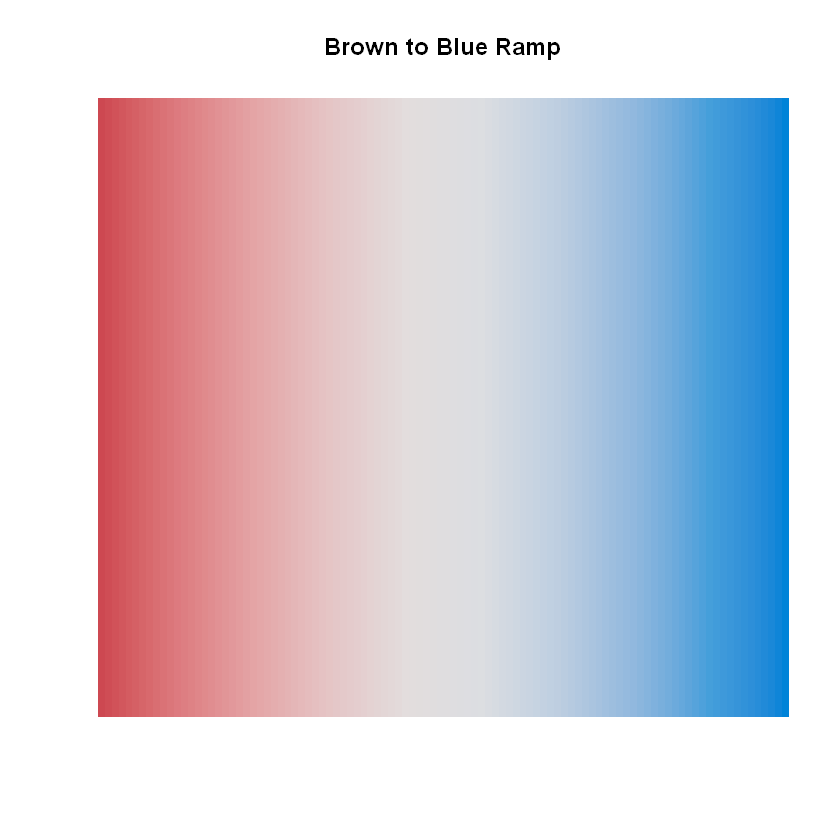

In [57]:
library(dichromat)
# Function to display color palette
al <- function(col, ...) {
    image(
        seq_along(col), 
        1, 
        matrix(seq_along(col), ncol = 1), 
        col = col, 
        axes = FALSE, 
        xlab = "", 
        ylab = "",
        ...)
}

colorschemes <- list(BrowntoBlue.10 = diverge_hcl(10, h = c(10, 240), c = 100, l = c(50, 90)))

pal <- colorRampPalette(colorschemes$BrowntoBlue.10, space = "Lab")(100)

al(pal, main = "Brown to Blue Ramp")
pal

**Activity 3:** Use ellipse library to create an elliptical correlation plot for the diamonds data using carat, price, table, and depth variables. Make sure to use a **colorblind safe, diverging** color scheme. 

Warning message:
"package 'ellipse' was built under R version 4.3.3"

Attaching package: 'ellipse'


The following object is masked from 'package:graphics':

    pairs




carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


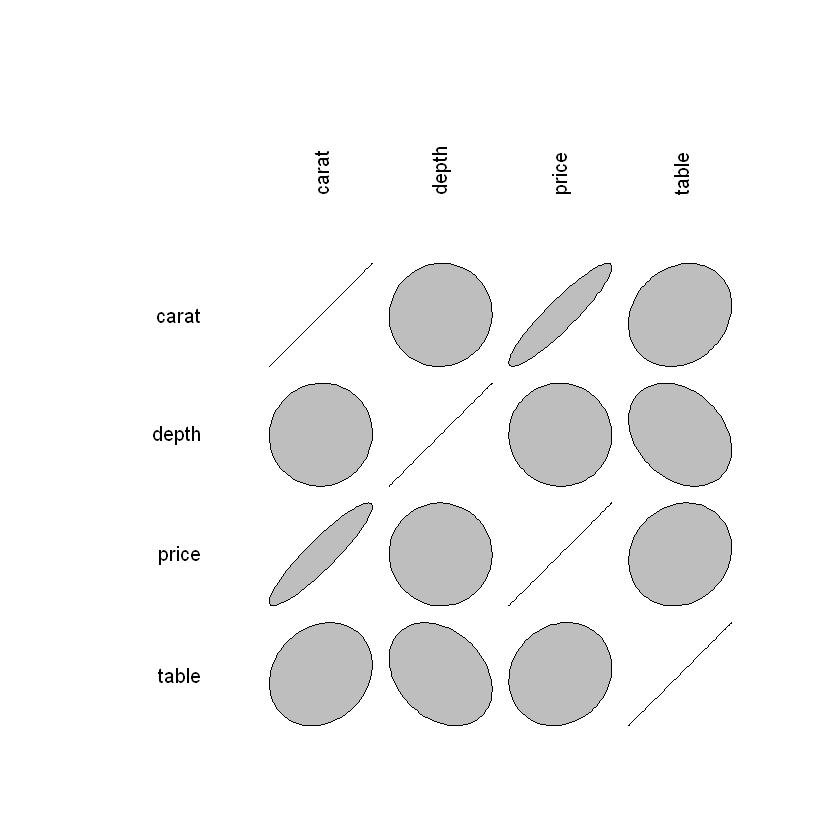

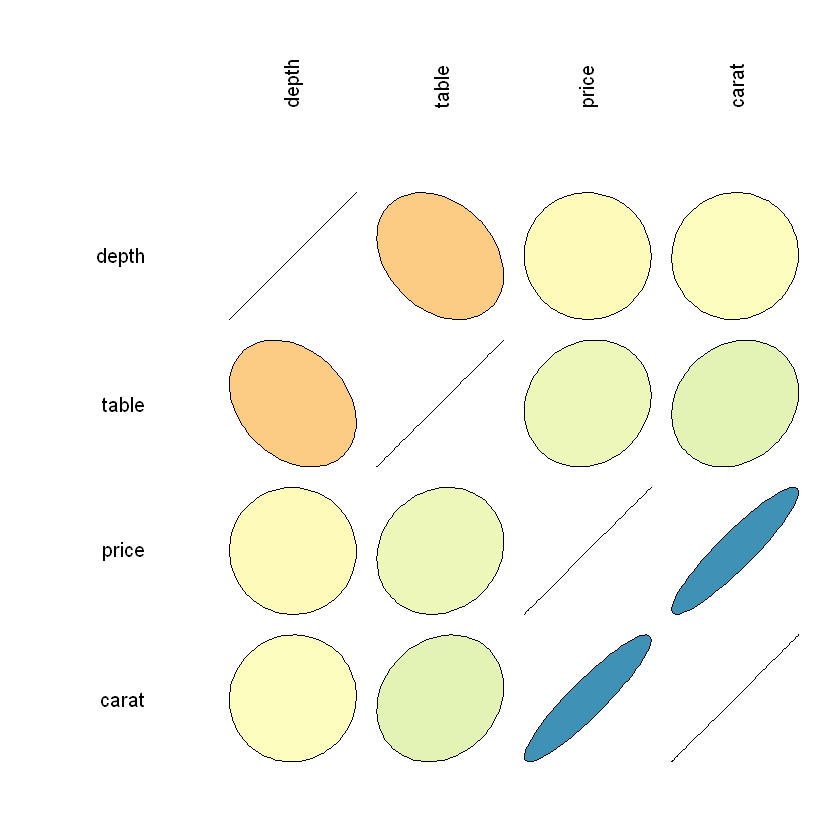

In [54]:
# Load necessary libraries
library(ellipse)
library(ggplot2)
library(RColorBrewer)

# Load the diamonds dataset
data(diamonds, package = "ggplot2")
head(diamonds)

# Select the desired columns
data <- diamonds[, c("carat", "depth", "price", "table")]

# correlatione  matrix
cor_data <- cor(data)

# Plot the correlation matrix
plotcorr(cor_data)

# Define the color palette
my_colors <- colorRampPalette(brewer.pal(5, "Spectral"))(100)

# Reorder the correlation matrix
ord <- order(cor_data[1, ])
cor_data_ord <- cor_data[ord, ord]

# Plot the reordered correlation matrix with custom colors
plotcorr(
    cor_data_ord, 
    col=my_colors[as.integer(cor_data_ord * 50 + 50)], 
    mar=c(0, 0, 0, 0)
)


**Activity 4:** Create a scatter plot using **all** diamonds data for carat vs. price and encode `clarity` variable with a **sequential** color scheme. 

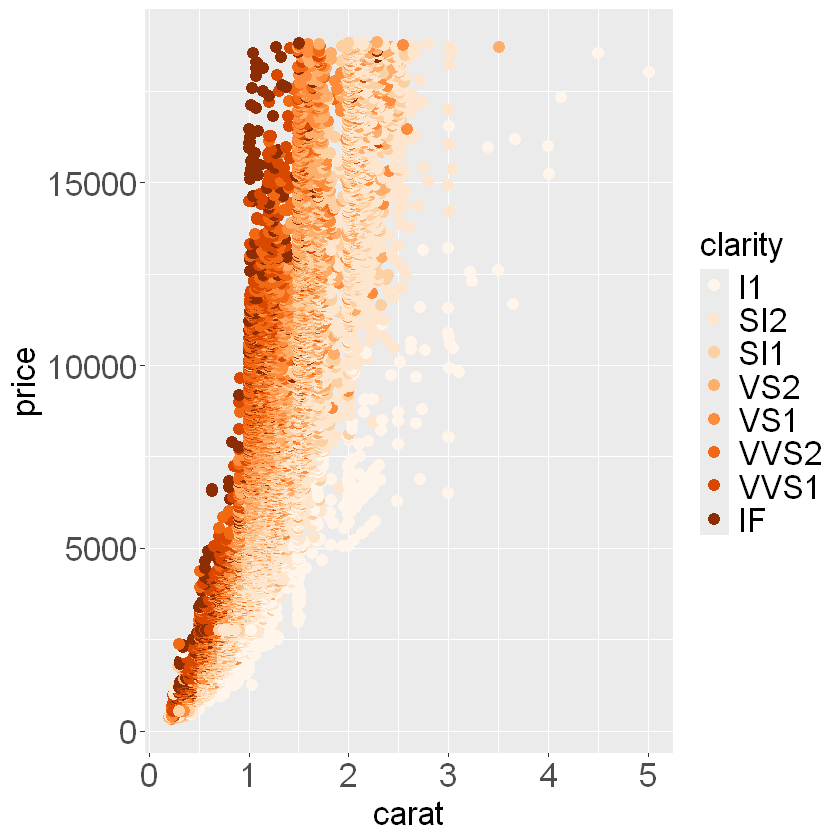

In [42]:
library(ggplot2)

gp <- (
    ggplot(diamonds) +
    aes(x=carat, y=price, color=clarity) + 
    geom_point(size=3)
)

(
    gp +
    scale_colour_brewer(palette = 'Oranges') +
    theme(
        legend.title = element_text(size=20),
        legend.text = element_text(size=20),
        axis.title = element_text(size=20),
        axis.text = element_text(size=20)
    )
)


**Activity 5:** Repeat Activity 4 with **alpha transparency**. **Is this a better idea? Discuss your answer.**

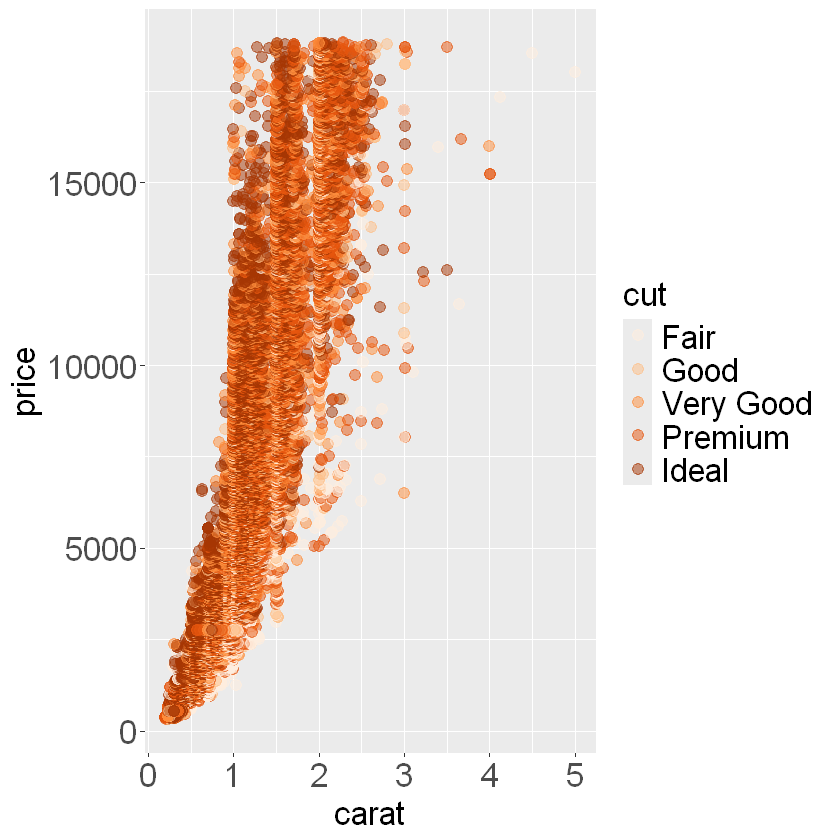

In [44]:
## Your answer for activity 5 goes here ---
gp <- (
    ggplot(diamonds) 
    + aes(x=carat, y=price, color=cut)
    + geom_point(size=3,alpha = 0.5)
)
(
    gp 
    + scale_colour_brewer(palette = 'Oranges')
    + theme(
        legend.title = element_text(size=20),
        legend.text = element_text(size=20),
        axis.title = element_text(size=20),
        axis.text = element_text(size=20),
    )
)
# hint: geom_point(alpha=0.5)

**Activity 6:** Recreate the following plot using `ggplot2` functions and the **mtcars** data set. 

Hint: you may have to change attribute characteristics, also look at theme functions in `ggplot2`. 

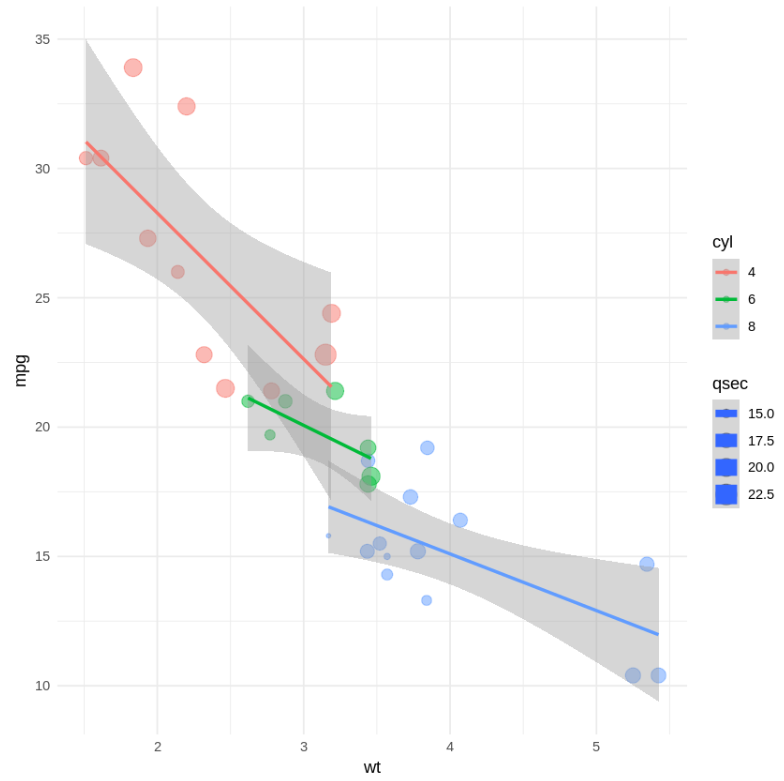

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation: size.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


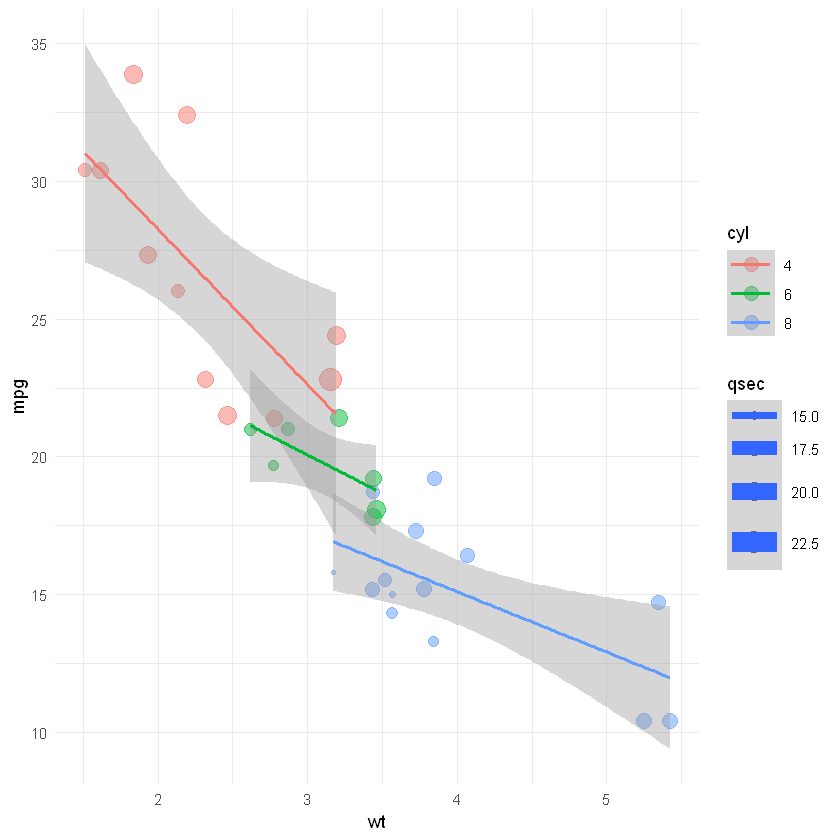

In [47]:
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(cyl), linetype = factor(cyl), size = qsec)) +
  geom_point(alpha = 0.5) +
  geom_smooth(aes(group = cyl),method = "lm",linetype = "solid") +
  labs(
       x = "wt",
       y = "mpg",
       color = "cyl",
       linetype = "cyl",
       size = "qsec") +
  guides(color = guide_legend(override.aes = list(size = 4), title = "cyl", keywidth = 2),
         linetype = guide_legend(override.aes = list(linetype = 1), title = "cyl", keywidth = 2),
         size = guide_legend(title = "qsec", keywidth = 1)) +
  theme_minimal()

# Please Save the file, then submit to Blackboard (File -> Save Notebook)